In [7]:
pip install pandas numpy tensorflow gradio scikit-learn

EDA

In [9]:
!pip install matplotlib seaborn wordcloud

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [11]:
# Load dataset
df = pd.read_csv("/content/Language Detection.csv")

# Show basic structure
print("Shape of dataset:", df.shape)
print("\nDataset info:")
print(df.info())


Shape of dataset: (10337, 2)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB
None


In [12]:
# Show first few rows
print("\nSample data:")
print(df.head())


Sample data:
                                                Text Language
0   Nature, in the broadest sense, is the natural...  English
1  "Nature" can refer to the phenomena of the phy...  English
2  The study of nature is a large, if not the onl...  English
3  Although humans are part of nature, human acti...  English
4  [1] The word nature is borrowed from the Old F...  English


In [13]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Text        0
Language    0
dtype: int64


In [14]:
# Number of unique languages
print("\nNumber of unique languages:", df['Language'].nunique())
print("Languages in dataset:", df['Language'].unique())


Number of unique languages: 17
Languages in dataset: ['English' 'Malayalam' 'Hindi' 'Tamil' 'Portugeese' 'French' 'Dutch'
 'Spanish' 'Greek' 'Russian' 'Danish' 'Italian' 'Turkish' 'Sweedish'
 'Arabic' 'German' 'Kannada']


<ipython-input-15-6cec091b185a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Language', order=df['Language'].value_counts().index, palette='viridis')


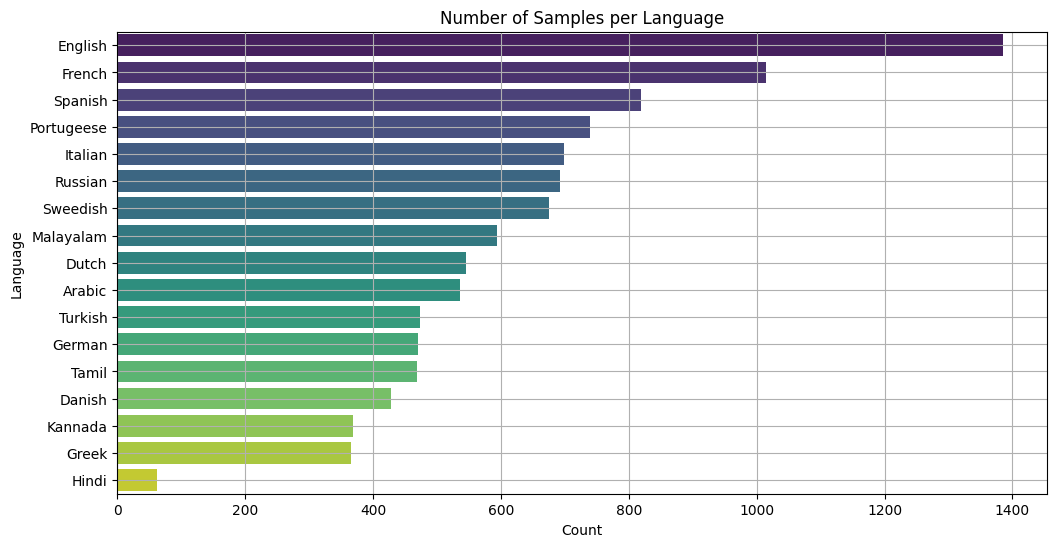

In [15]:
# Class distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Language', order=df['Language'].value_counts().index, palette='viridis')
plt.title("Number of Samples per Language")
plt.xlabel("Count")
plt.ylabel("Language")
plt.grid(True)
plt.show()

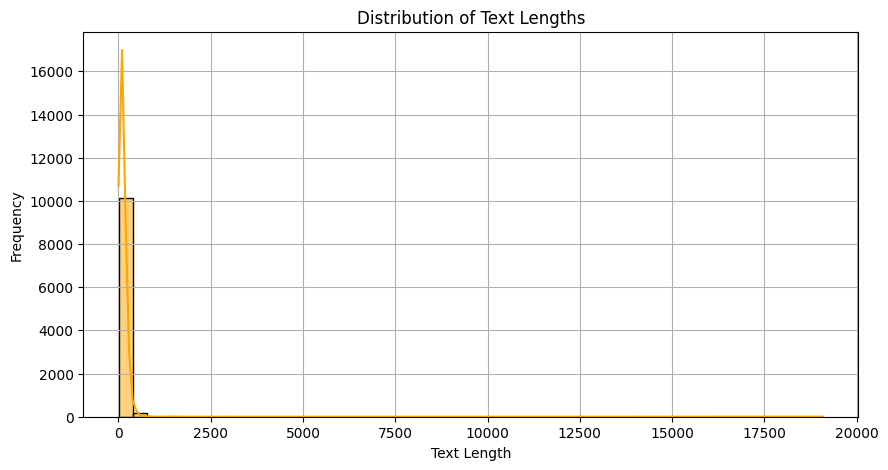

In [16]:
# Text length distribution
df['Text Length'] = df['Text'].apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(df['Text Length'], bins=50, kde=True, color='orange')
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

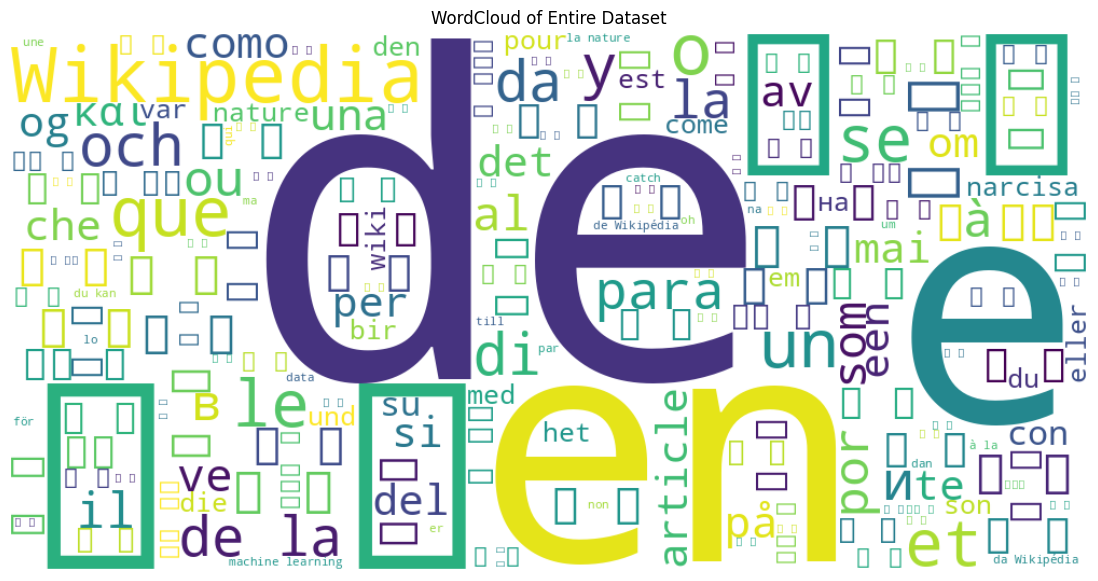

In [17]:
# WordCloud for all text (you can also do this language-wise)
all_text = ' '.join(df['Text'].astype(str))
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(all_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Entire Dataset")
plt.show()


MODEL IMPLEMENTATION

In [8]:
import pandas as pd
import numpy as np
import gradio as gr
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import os

# Load the dataset
df = pd.read_csv('/content/Language Detection.csv')[['Text', 'Language']]

# Encode language labels
label_encoder = LabelEncoder()
df['Language_Encoded'] = label_encoder.fit_transform(df['Language'])

# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])
padded = pad_sequences(sequences, maxlen=100)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(padded, df['Language_Encoded'], test_size=0.2, random_state=42)

# Model Definition
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=64)

# Save model and tokenizer
model.save("lstm_language_model.h5")
import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 37s 180ms/step - accuracy: 0.2529 - loss: 2.4091 - val_accuracy: 0.7955 - val_loss: 0.8297
Epoch 2/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 48s 236ms/step - accuracy: 0.8489 - loss: 0.6027 - val_accuracy: 0.9231 - val_loss: 0.3152
Epoch 3/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 40s 231ms/step - accuracy: 0.9488 - loss: 0.2255 - val_accuracy: 0.9449 - val_loss: 0.2114
Epoch 4/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 38s 206ms/step - accuracy: 0.9630 - loss: 0.1525 - val_accuracy: 0.9516 - val_loss: 0.1758
Epoch 5/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 36s 166ms/step - accuracy: 0.9732 - loss: 0.0983 - val_accuracy: 0.9487 - val_loss: 0.1837


65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step
✅ Accuracy: 0.9487427466150871

📊 Classification Report:
              precision    recall  f1-score   support

      Arabic       0.84      0.97      0.90       106
      Danish       0.93      0.89      0.91        73
       Dutch       0.97      0.94      0.95       111
     English       0.95      0.99      0.97       291
      French       0.99      0.95      0.97       219
      German       0.97      0.96      0.96        93
       Greek       0.97      0.96      0.96        68
       Hindi       1.00      1.00      1.00        10
     Italian       0.99      0.93      0.96       145
     Kannada       0.77      0.98      0.87        66
   Malayalam       0.96      0.86      0.91       121
  Portugeese       0.99      0.96      0.98       144
     Russian       0.94      0.96      0.95       136
     Spanish       0.91      0.97      0.94       160
    Sweedish       0.98      0.93      0.96       133
       Tamil       0.96      0.94     

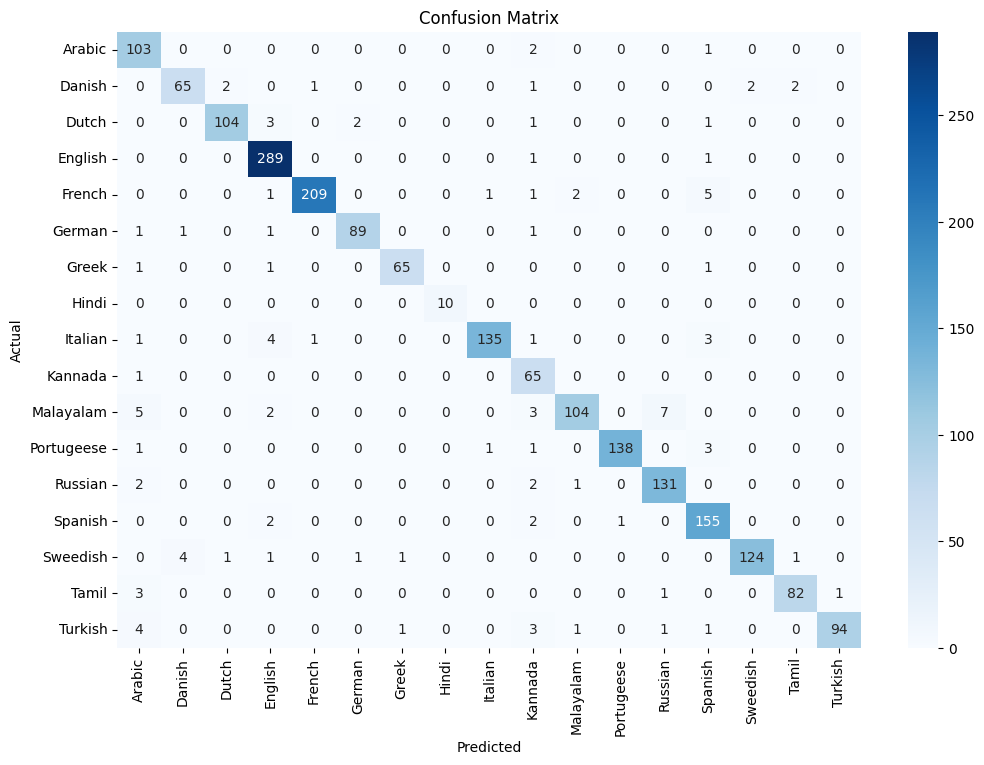

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Predict the class probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to predicted class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", accuracy)

# Detailed report: Precision, Recall, F1-score
print("\n📊 Classification Report:")
# Replace 'le' with 'label_encoder'
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Optional: Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
# Replace 'le' with 'label_encoder'
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

GRADIO (GUI)

In [6]:
import gradio as gr
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

# Load the model and preprocessing tools
model = load_model("lstm_language_model.h5")
with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)
with open("label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)

# Prediction Function
def predict_language(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=100)
    pred = model.predict(padded)[0]
    top_idx = np.argmax(pred)
    confidence = pred[top_idx]
    language = label_encoder.inverse_transform([top_idx])[0]
    return f"🌐 Detected Language: {language} ({confidence * 100:.2f}%)"

# Gradio Interface
iface = gr.Interface(
    fn=predict_language,
    inputs=gr.Textbox(lines=2, placeholder="Type a sentence...", label="Your Input"),
    outputs=gr.Textbox(label="Predicted Language"),
    title="🧠 Deep Learning Language Detector",
    description="Real-time language detection using LSTM trained on text input.",
    theme="default"
)

iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9570bac0cfa0a5b0c0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
